# Uncertainty on market shares

In [17]:
import brightway2 as bw
import bw2calc as bc
import bw2data as bd
import numpy as np
import pandas as pd
import presamples as ps
import scipy
import scipy.stats as stats
ps.__version__
import seaborn as sns

In [18]:
sns.set_style("darkgrid")

In [19]:
Simple_local_results = pd.read_csv("results/Simple_local_results.csv")

Simple_local_morris_results = pd.read_csv("results/Simple_local_morris_results.csv")
Simple_global_sobol_results = pd.read_csv("results/Simple_global_results_sobol.csv")
Simple_global_morris_results = pd.read_csv("results/Simple_global_results_morris.csv")


Simple_global_scores = pd.read_csv("results/Simple_global_scores_sobol.csv")
Simple_global_morris_scores = pd.read_csv("results/Simple_global_scores_morris.csv")

Simple_local_scores = pd.read_csv("results/Simple_local_morris_scores.csv")
Simple_local_scores_deterministic = pd.read_csv("results/Simple_local_scores_deterministic.csv")
Simple_global_std_scores = pd.read_csv("results/Simple_std_scores_sobol.csv")

In [20]:
Simple_local_morris_results

,names,mu,mu_star,sigma,mu_star_conf,index
0,M0,-0.059710,0.059710,0.005831,0.000455,M0
1,M1,10.810137,10.810137,1.046806,0.085455,M1


# Simple local and global results

In [21]:
Simple_local_scores_static = Simple_local_scores_deterministic.iloc[[0, 3, 1, 2, 4]]
Simple_local_scores_static['market scenarios']=['Baseline','M0','M0', 'M1', 'M1']
Simple_local_scores_static['process']=['Baseline','Pr1 = 0\nM0', 'Pr1 = 1\nM0', 'Pr2 = 0\nM1', 'Pr2 = 1\nM1']
Simple_global_scores_3136_N= Simple_global_scores[Simple_global_scores['category']== 3136]

C:\Users\rla44\AppData\Local\Temp\ipykernel_16068\811286329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Simple_local_scores_static['market scenarios']=['Baseline','M0','M0', 'M1', 'M1']
C:\Users\rla44\AppData\Local\Temp\ipykernel_16068\811286329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Simple_local_scores_static['process']=['Baseline','Pr1 = 0\nM0', 'Pr1 = 1\nM0', 'Pr2 = 0\nM1', 'Pr2 = 1\nM1']


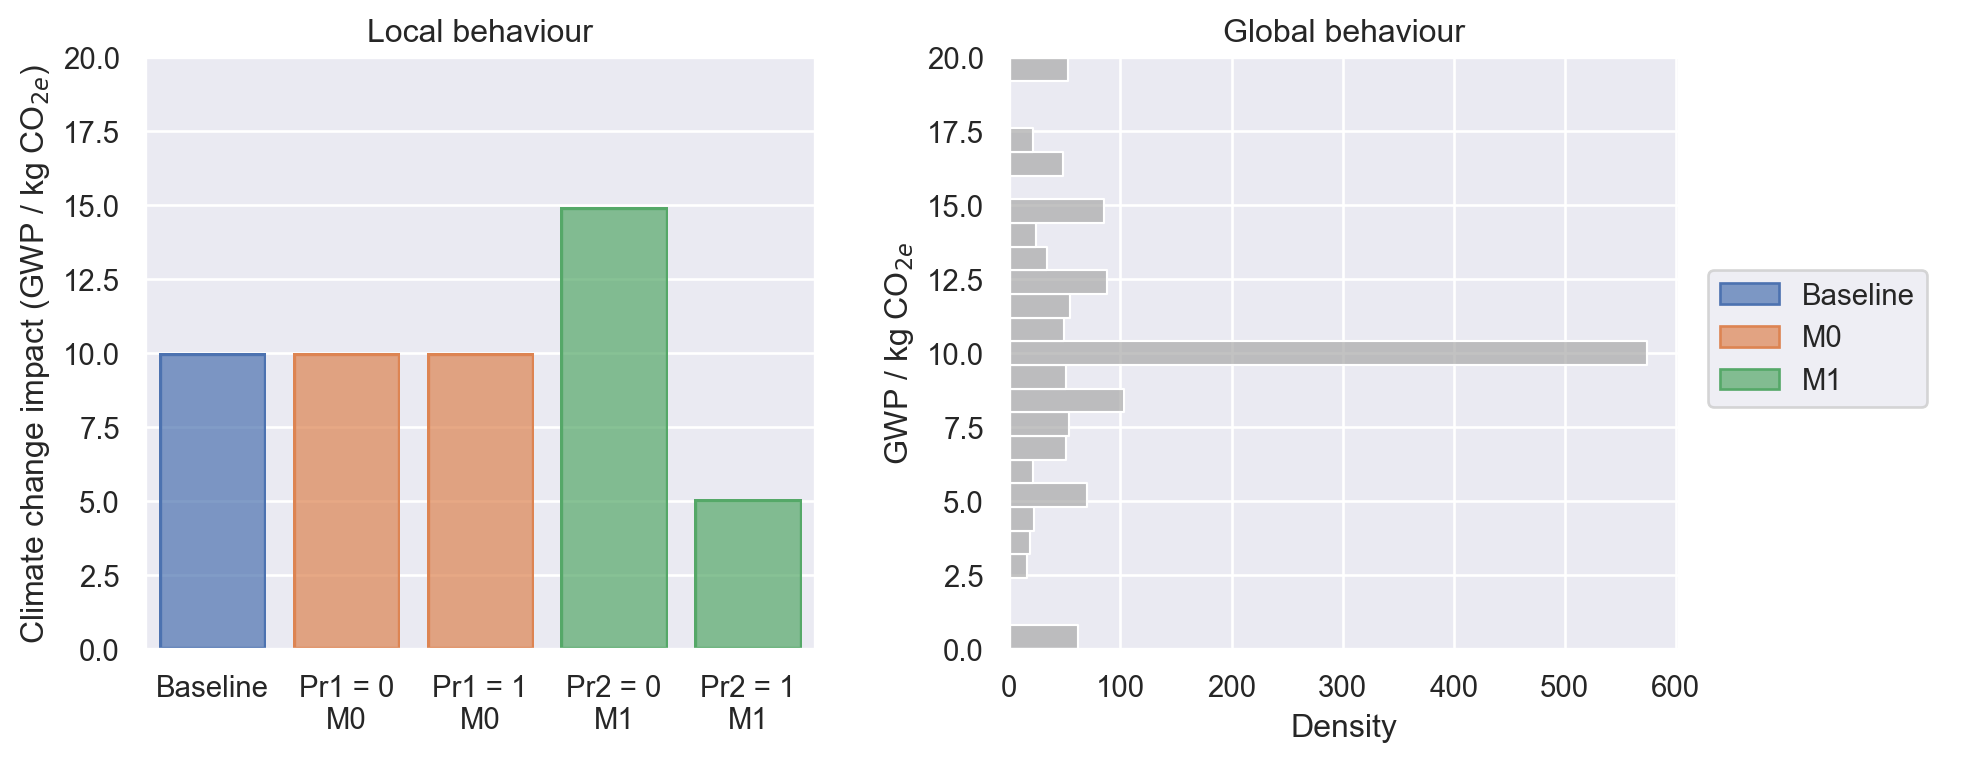

In [ ]:
import matplotlib as mpl
import seaborn.objects as so
import matplotlib.pyplot as plt
f = mpl.figure.Figure(figsize=(9,4), dpi=100)
subfigures = f.subfigures(1, 2)

sf1, sf2 = subfigures

p1 =(
    so.Plot(Simple_local_scores_static, y="score", x="process", color='market scenarios')
    .limit(y=(0, 20))
    .label(color="",y="Climate change impact (GWP / kg CO$_{2e}$)", x="", title="Local behaviour"
    )
    .add(so.Bar())

)
p1.on(sf1).plot()

p2 = (
    so.Plot(Simple_global_std_scores, y="score")  # Move 'score' to y-axis
    .add(so.Bars(color="darkgrey"), so.Hist(bins=25))
    .label(y="GWP / kg CO$_{2e}$", x="Density",  # Swap labels for x and y
           title="Global behaviour", color="")
    .limit(y=(0, 20))  # Limit for the new y-axis
)
p2.on(sf2).plot()

#f.savefig("figures/simple_sys_scores.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, -0.5, 8.69, 4))


# Sensitivity indices

In [23]:
Simple_local_std = Simple_local_scores.groupby(['method', 'category'])['score'].agg(
    std =lambda x: x.std(),

).reset_index()

In [24]:
Simple_local_morris_results

,names,mu,mu_star,sigma,mu_star_conf,index
0,M0,-0.059710,0.059710,0.005831,0.000455,M0
1,M1,10.810137,10.810137,1.046806,0.085455,M1


In [25]:
Simple_global_sobol_results= Simple_global_sobol_results[Simple_global_sobol_results['index'] == 1024]
Simple_global_morris_results = Simple_global_morris_results[Simple_global_morris_results['index'] == 300]

In [26]:
Simple_local_morris_results.set_index('names', inplace=True)
Simple_global_morris_results.set_index('names', inplace=True)
Simple_global_sobol_results.set_index('names', inplace=True)
Simple_local_std.set_index('category', inplace=True)

In [27]:
Simple_global_morris_results

,mu,mu_star,sigma,mu_star_conf,mean,index
names,,,,,,
M0,-3.280732,9.475597,10.477989,0.626785,10,300
M1,1.658825,10.513410,13.979548,1.050471,10,300


In [28]:
Simple_global_morris_results = Simple_global_morris_results.drop(['mu','mu_star_conf','sigma', 'index'], axis=1)
Simple_local_morris_results = Simple_local_morris_results.drop(['mu','mu_star_conf','sigma','index'], axis=1)
Simple_global_sobol_results = Simple_global_sobol_results.drop(['S1','S1_conf' ,'ST_conf','index'], axis=1)
Simple_local_std  = Simple_local_std.drop(['method'], axis=1)
Simple_global_std  = Simple_global_std_scores.drop(['method', 'iteration', 'category', 'runtime', 'runs' ], axis=1)

In [29]:
Simple_global_morris_results

,mu_star,mean
names,,
M0,9.475597,10
M1,10.513410,10


In [30]:
Simple_global_std = Simple_global_scores.groupby(['scenario'])['score'].agg(
    std =lambda x: x.std(),

)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

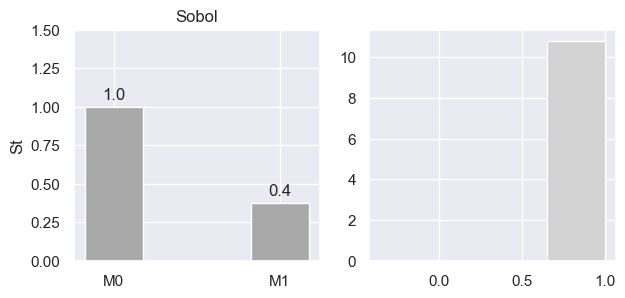

In [31]:
methods = ['M0', 'M1']
sns.set_context("notebook", font_scale=1) 

# Extract values in assumed order (ensure your DataFrames are ordered or indexed correctly)
sobol_global = Simple_global_sobol_results.loc[methods].values.flatten()
morris_global = Simple_global_morris_results.loc[methods].values.flatten()
morris_local = Simple_local_morris_results.loc[methods].values.flatten()

# Set up plot
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# --- Sobol Global Plot ---
x = np.arange(len(methods))
width = 0.35

bars_sobol = axes[0].bar(x, sobol_global, width, label='Global', color='darkgrey')

# Add value labels on Sobol bars
for bar in bars_sobol:
    height = bar.get_height()
    axes[0].annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

axes[0].set_xticks(x)
axes[0].set_ylim(0,1.5)
axes[0].set_xticklabels(methods)
axes[0].set_ylabel('St')
axes[0].set_title('Sobol')
#axes[0].legend()

# --- Morris Plot (both global and local) ---
bars_local = axes[1].bar(x - width/2, morris_local, width, label='Local', color='lightgrey')
bars_global = axes[1].bar(x + width/2, morris_global, width, label='Global', color='darkgrey')

# Add value labels on Morris bars
for bar in bars_local + bars_global:
    height = bar.get_height()
    axes[1].annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

axes[1].set_xticks(x)
axes[1].set_xticklabels(methods)
axes[1].set_ylim(0,15)
axes[1].set_ylabel('μ*')
axes[1].set_title('Morris')
axes[1].legend()

axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Save with bbox adjustment
fig.savefig("figures/simple_sensitivity_indices_bar.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, 0, 9, 3))

